In [5]:
import numpy as np
from scipy.fftpack import fft
from scipy.signal import hann
import matplotlib.pyplot as plt
import pandas as pd

run_number = 1
# Load your sound pressure data here and store it in the variable "sound_pressure"
data2 = pd.read_excel('Averaged Data b15.xlsx')
file_pattern = 'b15_Run{}.xlsx'
file_name = file_pattern.format(run_number)
data = pd.read_excel(file_name)

data.shape

(255999, 9)

In [8]:
sound_pressure = data.iloc[:, 0].values


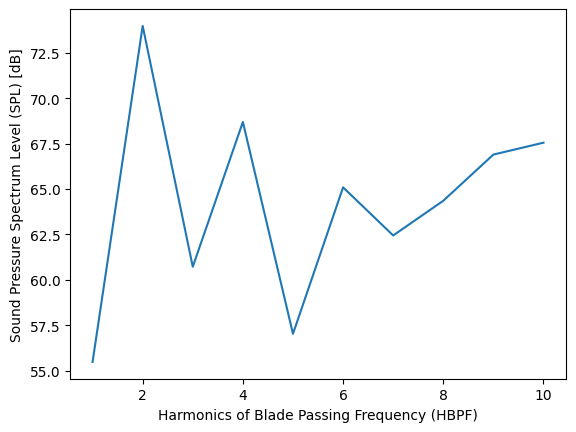

In [10]:
# Define some constants
sample_rate = 44100  # Sampling rate in Hz
num_blades = 3  # Number of fan blades
omega = data2.values[run_number, 7]  # Rotational speed of the fan in rad/s
# convert omega to RPM
rotating_speed = omega * 60 / (2 * np.pi)  # Rotating speed of the fan in RPM

# Calculate the blade passing frequency
blade_passing_frequency = num_blades * rotating_speed / 60  # in Hz

# Calculate the length of the data in seconds and the number of samples
data_length = len(sound_pressure) / sample_rate
num_samples = len(sound_pressure)

# Apply a Hann window to the data
window = hann(num_samples)
sound_pressure = sound_pressure * window

# Compute the FFT of the sound pressure data
fft_data = fft(sound_pressure)
freqs = np.linspace(0, sample_rate, num_samples)

# Find the indices of the harmonics of the blade passing frequency
harmonic_indices = []
for i in range(1, 11):
    harmonic_frequency = blade_passing_frequency * i
    harmonic_index = np.argmin(np.abs(freqs - harmonic_frequency))
    harmonic_indices.append(harmonic_index)
    
# Compute the sound pressure spectrum level in dB for each harmonic
spl = 20 * np.log10(np.abs(fft_data[harmonic_indices]))

# Plot the sound pressure spectrum level vs. the harmonics of the blade passing frequency
plt.plot(np.arange(1, 11), spl)
plt.xlabel('Harmonics of Blade Passing Frequency (HBPF)')
plt.ylabel('Sound Pressure Spectrum Level (SPL) [dB]')
plt.show()